In [2]:
import os
import json
import librosa
import numpy as np
from tqdm import tqdm

In [3]:
train_path = '/home/super/datasets-nas/audio_merged_dataset/esc50_urbansound/train'
test_path = '/home/super/datasets-nas/audio_merged_dataset/esc50_urbansound/test'
out_class_json = '/home/super/datasets-nas/audio_merged_dataset/esc50_urbansound/classes.json'
out_prepared_dataset = '/home/super/datasets-nas/audio_merged_dataset/esc50_urbansound/esc50_urbansound.npy'

In [4]:
classes = os.listdir(train_path)
classes.sort()
print(classes)

with open(out_class_json, 'w') as f:
    json.dump({i:v for i, v in enumerate(classes)}, f)

class2index = {v:i for i, v in enumerate(classes)}

['airplane', 'car_horn', 'chainsaw', 'children_playing', 'church_bells', 'dog_bark', 'drilling', 'engine', 'fireworks', 'hand_saw', 'helicopter', 'jackhammer', 'siren', 'street_music', 'train']


In [4]:
audio_len = []
for fold_number, fold_path in enumerate([train_path, test_path]):
    for c in tqdm(os.listdir(fold_path)):
        class_id = int(class2index[c])
        for file_name in os.listdir(os.path.join(fold_path, c)):
            file_path = os.path.join(fold_path, c, file_name)
            
            ## loading audio file
            audio, sr = librosa.load(file_path, sr=32000, res_type='kaiser_fast')
            audio_len.append(len(audio))

100%|██████████| 15/15 [01:06<00:00,  4.44s/it]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

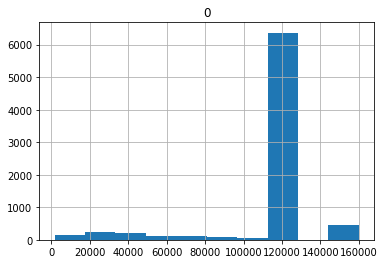

In [5]:
import pandas as pd

df = pd.DataFrame(audio_len)
df.hist()

In [7]:
output_dict = [[] for _ in range(10)]
max_audio_len = 129173
max = 0
for fold_number, fold_path in enumerate([train_path, test_path]):
    for c in tqdm(os.listdir(fold_path)):
        class_id = int(class2index[c])
        for file_name in os.listdir(os.path.join(fold_path, c)):
            file_path = os.path.join(fold_path, c, file_name)
            
            ## loading audio file
            audio, sr = librosa.load(file_path, sr=32000, res_type='kaiser_fast')

            if len(audio) > max:
                max = len(audio)
                print('rel max:', max)
            if len(audio) > max_audio_len:
                audio = audio[:max_audio_len]
            else:
                audio = np.pad(audio, (0, max_audio_len - len(audio)), 'constant', constant_values=0)

            output_dict[fold_number].append(
            {
                "name": file_name,
                "target": int(class_id),
                "waveform": audio
            }
            )
print('real max:', max, 'pad:', max_audio_len)

  0%|          | 0/15 [00:00<?, ?it/s]

rel max: 6080
rel max: 7881
rel max: 160000


100%|██████████| 15/15 [00:26<00:00,  1.78s/it]

real max: 160000 pad: 129173


In [8]:
np.save(out_prepared_dataset, output_dict)

/home/super/nic/HTS-Audio-Transformer/venv/lib/python3.8/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
